# Dynamic Latent Variable Models



### Preliminaries

- Goal 
  - Introduction to dynamic (=temporal) Latent Variable Models, including the Hidden Markov Model and Kalman filter.   
- Materials
  - Mandatory
    - These lecture notes
  - Optional 
    - Bishop pp.605-615 on Hidden Markov Models
    - Bishop pp.635-641 on Kalman filters
    - Faragher (2012), [Understanding the Basis of the Kalman Filter](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf)
    - Minka (1999), [From Hidden Markov Models to Linear Dynamical Systems](./files/Minka-1999-from-HMM-to-LDS.pdf)
      


### Example Problem

- <span class="exercise">We consider a one-dimensional cart position tracking problem, see</span>  [Faragher 2012](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf).  

- <span class="exercise">The hidden states are the position $z_t$ and velocity $\dot z_t$. We can apply an external acceleration/breaking force $u_t$. (Noisy) observations are represented by $x_t$.</span> 

- <span class="exercise">The equations of motions are given by</span>

$$\begin{align*}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
x_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x) 
\end{align*}$$

- <span class="exercise">Infer the position after 10 time steps.</span> 

<img src="./figures/Faragher-2012-cart-1.png" width="600px">


### Dynamical Models

<!--- - In this lesson, we consider models where the sequence order of observations matters. 
--->

- Consider the _ordered_ observation sequence $x^T \triangleq \left(x_1,x_2,\ldots,x_T\right)$.

- We wish to develop a generative model
    $$ p( x^T \,|\, \theta)$$
that 'explains' the time series $x^T$.

- We cannot use the IID assumption $p( x^T  | \theta) = \prod_t p(x_t \,|\, \theta)$. In general, we _can_ use the [**chain rule**](https://en.wikipedia.org/wiki/Chain_rule_(probability) (a.k.a. the general product rule)

$$\begin{align*}
p(x^T) &= p(x_T|x^{T-1}) \,p(x^{T-1}) \\
  &=  p(x_T|x^{T-1}) \,p(x_{T-1}|x^{T-2}) \cdots p(x_2|x_1)\,p(x_1) \\
  &= p(x_1)\prod_{t=2}^T p(x_t\,|\,x^{t-1})
\end{align*}$$

- Generally, we will want to limit the depth of dependencies on previous observations. For example, the $M$th-order linear **Auto-Regressive** (AR) model
    $$\begin{align*}
  p(x_t|x^{t-1}) = \mathcal{N}\left( \sum_{m=1}^M a_m x_{t-m}\,,\sigma^2\,\right)  
    \end{align*}$$
    limits the dependencies to the past $M$ samples.

### State-space Models

- A limitation of AR models is that they need a lot of parameters in order to create a flexible model. E.g., if $x_t$ is an $K$-dimensional discrete variable, then an $M$th-order AR model will have $K^{M-1}(K-1)$ parameters. 

- Similar to our work on Gaussian Mixture models and latent Factor models, we can create a flexible dynamic system by introducing _latent_ (unobserved) variables  $z^T \triangleq \left(z_1,z_2,\dots,z_T\right)$ (one $z_t$ for each observation $x_t$). In dynamic systems, the latent variables $z_t$ are usually called _state variables_.

- A general **state space model** is defined by

$$\begin{align*}
p&(z_t\,|\,z^{t-1}) \tag{state transition model}  \\
p&(x_t\,|\,z_t) \tag{observation model}  \\
p&(z_1) \tag{initial state}
\end{align*}$$

- A very common computational assumption is to let state transitions be ruled by a _first-order Markov chain_ as
$$
 p(z_t\,|\,z^{t-1}) = p(z_t\,|\,z_{t-1})
$$

- The Markov assumption leads to the following joint probability distribution for the state-space model:
$$
 p(x^T,z^T) = \underbrace{p(z_1)}_{\text{initial state}} \prod_{t=2}^T \underbrace{p(z_t\,|\,z_{t-1})}_{\text{state transitions}}\,\prod_{t=1}^T \underbrace{p(x_t\,|\,z_t)}_{\text{observations}}
$$

- The Forney-style factor graph for a state-space model:

<img src="./figures/ffg-state-space.png" width="600px">

- <span class="exercise">Exercise: Show that in a state-space model $x_t$ is not a first-order Markov chain in the observations, i.e., show that $$p(x_t\,|\,x_{t-1},x_{t-2}) \neq p(x_t\,|\,x_{t-1})\,.$$</span>

### Hidden Markov Models and Linear Dynamical Systems

- A **Hidden Markov Model** (HMM) is a state-space model with <span class="emphasis">discrete-valued</span> state variables $Z_t$.

- E.g., $Z_t$ is a $K$-dimensional hidden binary 'class indicator' with transition probabilities $A_{jk} \triangleq p(z_{tk}=1\,|\,z_{t-1,j}=1)$, or equivalently
  $$p(z_t|z_{t-1}) = \prod_{k=1}^K \prod_{j=1}^K A_{jk}^{z_{t-1,j}z_{tk}}$$
which is usually accompanied by an initial state distribution $\pi_k \triangleq p(z_{1k}=1)$.

  
- The classical HMM has also discrete-valued observations but in pratice any (probabilistic) observation model $p(x_t|z_t)$ may be coupled to the hidden Markov chain. 

<!---
- The following figure shows the typical trellis structure of the many possible state transitions paths.   
<img src="./figures/Figure13.7.png" width="400px">
--->

- Another well-known state-space model with <span class="emphasis">continuous-valued</span> state variables $Z_t$ is the **(Linear) Gaussian Dynamical System** (LGDS), which is defined as

$$\begin{align*}
p(z_t\,|\,z_{t-1}) &= \mathcal{N}\left(\, A z_{t-1}\,,\,\Sigma_z\,\right) \\ 
p(x_t\,|\,z_t) &= \mathcal{N}\left(\, C z_t\,,\,\Sigma_x\,\right) \\
p(z_1) &= \mathcal{N}\left(\, \mu_1\,,\,\Sigma_1\,\right)
\end{align*}$$
<!---or, equivalently (in the usual state-space notation)
$$\begin{align*}
z_k &= A z_{k-1} + \mathcal{N}\left(0,\Sigma_z \right) \\ 
x_k &= C z_k + \mathcal{N}\left( 0, \Sigma_x \right) \\
z_1 &= \mu_1 + \mathcal{N}\left( 0, \Sigma_1\right)
\end{align*}$$
--->

- Note that the joint distribution over $\{(x_1,z_1),\ldots,(x_t,z_t)\}$ is a (large-dimensional) Gaussian distribution. This means that, in principle, every inference problem on the LGDS model also leads to a Gaussian distribution.

- HMM's and LGDS's (and variants thereof) are at the basis of a wide range of complex information processing systems, such as speech and language recognition, robotics and automatic car navigation, and even processing of DNA sequences.  

### Kalman Filtering

- Technically, a [**Kalman filter**](https://en.wikipedia.org/wiki/Kalman_filter) is the solution to the recursive estimation (inference) of the hidden state $z_t$ based on past observations in an LGDS, i.e., Kalman filtering solves the problem $p(z_t\,|\,x^t)$ based on the previous estimate $p(z_{t-1}\,|\,x^{t-1})$ and a new observation $x_t$ (in the context of the given model specification of course). 
 

 
- Let's infer the Kalman filter for a scalar linear Gaussian dynamical system:
$$\begin{align*}
    p(z_t\,|\,z_{t-1}) &= \mathcal{N}(z_t\,|\,a z_{t-1},\sigma_z^2) \tag{state transition}   \\
    p(x_t\,|\,z_t) &= \mathcal{N}(x_t\,|\,c z_t,\sigma_x^2) \tag{observation}     
\end{align*}$$

        
- Kalman filtering comprises inferring $p(z_t\,|\,x^t)$ from a given prior estimate $p(z_{t-1}\,|\,x^{t-1})$ and a new observation $x_t$. Let us assume that 
$$\begin{align} 
p(z_{t-1}\,|\,x^{t-1}) = \mathcal{N}(z_{t-1} \,|\, \mu_{t-1}, \sigma_{t-1}^2) \tag{prior}
\end{align}$$ 

- Note that everything is Gaussian, so this is _in principle_ possible to execute inference problems analytically and the result will be a Gaussian posterior:

$$\begin{align*}
p(z_t\,|\,x^t) &= p(z_t\,|\,x_t,x^{t-1}) \propto p(x_t,z_t\,|\,x^{t-1}) \\
  &\propto p(x_t\,|\,z_t) \,p(z_t\,|\,x^{t-1}) \\
  &= p(x_t\,|\,z_t) \, \sum_{z_{t-1}} p(z_t,z_{t-1}\,|\,x^{t-1}) \\
  &= \underbrace{p(x_t\,|\,z_t)}_{\text{observation}} \, \sum_{z_{t-1}} \underbrace{p(z_t\,|\,z_{t-1})}_{\text{state transition}} \, \underbrace{p(z_{t-1}\,|\,x^{t-1})}_{\text{prior}} \\
  &= \mathcal{N}(x_t\,|\,c z_t,\sigma_x^2) \sum_{z_{t-1}} \mathcal{N}(z_t\,|\,a z_{t-1},\sigma_z^2) \, \mathcal{N}(z_{t-1} \,|\, \mu_{t-1}, \sigma_{t-1}^2) \\
  &\propto \mathcal{N}\left(z_t\,\bigm| \,\frac{x_t}{c} ,\left(\frac{\sigma_x}{c}\right)^2\right) \times \mathcal{N}\left(z_t\, \bigm|\,a \mu_{t-1},\sigma_z^2 + \left(a \sigma_{t-1}\right)^2 \right) \\
  &= \mathcal{N}\left( z_t \,|\, \mu_t, \sigma_t^2\right)
\end{align*}$$
with
$$\begin{align*}
  \rho_t^2 &= \sigma_z^2 + a^2 \sigma_{t-1}^2 \tag{auxiliary variable}\\
  K_t &= \frac{c \rho_t^2}{c^2 \rho_t^2 + \sigma_x^2} \tag{'Kalman gain'} \\
  \mu_t &= a \mu_{t-1} + K_t \cdot \left( x_t - c a \mu_{t-1}\right) \tag{posterior mean}\\
  \sigma_t^2 &= \left( 1 - K_t \right) \rho_t^2 \tag{posterior variance}
\end{align*}$$

- Kalman filtering consists of computing these four equations for each new observation ($x_t$). 

- In short, it is possible to analytically derive the Kalman filter for a linear dynamical system with Gaussian state and observation noise (eventhough it is not a fun exercise). 

- If anything changes in the model, e.g., the state noise is not Gaussian, then you have to re-derive the inference equations again from scratch and it may not lead to an analytically pleasing answer. 

- $\Rightarrow$ Generally, we will want to automate the inference process. 

### Message Passing in State-space Models

- Once the (state-space) models have been specified, we can define state and parameter estimation problems as inference tasks on the generative model. 

- In principle, for linear Gaussian models these inference tasks can be analytically solved, see e.g. [Faragher, 2012](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf) 
  - These derivations quickly become quite laborious  

- Alternatively, we could specify the generative model in a (Forney-style) factor graph and use automated message passing to infer the posterior over the hidden variables. E.g., the message passing schedule for Kalman filtering looks like this: 

<img src="./figures/ffg-state-space-with-state-estimation.png" width="600">

### Example Problem Revisited

We can solve the cart tracking problem by sum-product message passing in a factor graph like the one depicted above. All we have to do is create factor nodes for the state-transition model $p(z_t|z_{t-1})$ and the observation model $p(x_t|z_t)$. Then we just build the factor graph and let ForneyLab (factor graph toolbox) perform message passing. 

We'll implement the following model:

$$\begin{align*}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
\mathbf{x}_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x)
\end{align*}$$

In [1]:
using ForneyLab
include("scripts/cart_tracking_helpers.jl") # implements required factor nodes + helper functions

# Specify the model parameters
Δt = 1.0                     # assume the time steps to be equal in size
A = [1.0 Δt;
     0.0 1.0]
b = [0.5*Δt^2; Δt] 
Σz = diagm([0.2*Δt; 0.1*Δt]) # process noise covariance
Σx = diagm([1.0; 2.0])      # observation noise covariance;

# Generate noisy observations
n = 10                # perform 10 timesteps
z_start = [10.0; 2.0] # initial state
u = 0.2 * ones(n)     # constant input u
noisy_x = generateNoisyMeasurements(z_start, u, A, b, Σz, Σx);

Since the factor graph is just a concatination of $n$ identical "sections", we only have to specify a single section. When running the message passing algorithm we will explictly use the posterior of the previous timestep as prior in the next one. Let's build a section of the factor graph:

In [2]:
fg = FactorGraph()
z_prev_m = Variable(id=:z_prev_m); placeholder(z_prev_m, :z_prev_m, dims=(2,))
z_prev_v = Variable(id=:z_prev_v); placeholder(z_prev_v, :z_prev_v, dims=(2,2))
bu = Variable(id=:bu); placeholder(bu, :bu, dims=(2,))

@RV z_prev ~ GaussianMeanVariance(z_prev_m, z_prev_v, id=:z_prev) # p(z_prev)
@RV noise_z ~ GaussianMeanVariance(constant(zeros(2), id=:noise_z_m), constant(Σz, id=:noise_z_v)) # process noise
@RV z = constant(A, id=:A) * z_prev + bu + noise_z; z.id = :z # p(z|z_prev) (state transition model)
@RV x ~ GaussianMeanVariance(z, constant(Σx, id=:Σx)) # p(x|z) (observation model)
placeholder(x, :x, dims=(2,));
# ForneyLab.draw(fg)

Now that we've built the factor graph, we can perform Kalman filtering by inserting measurement data into the factor graph and performing message passing.

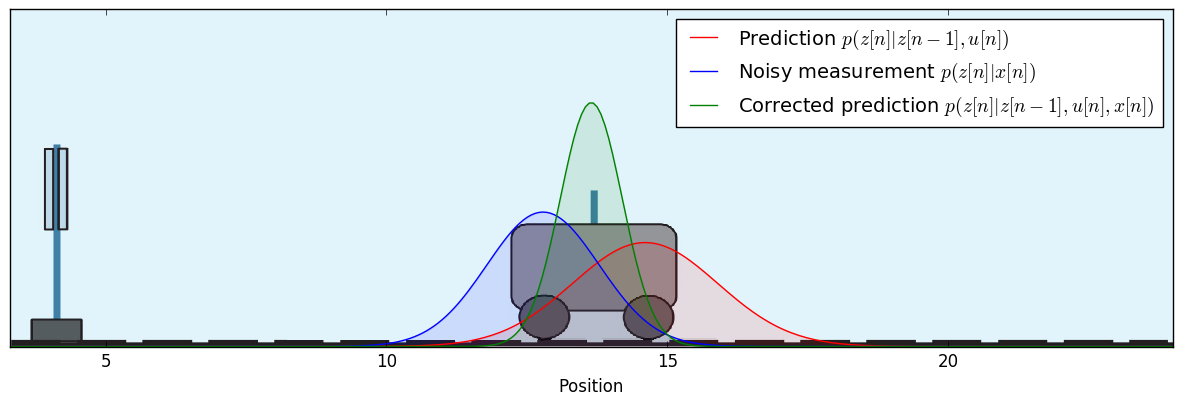

In [3]:
eval(parse(sumProductAlgorithm(z))) # build message passing algorithm
marginals = Dict()
messages = Array{Message}(6)
data = Dict(:x => noisy_x[1], :bu => b*u[1], :z_prev_m => zeros(2), :z_prev_v => 1e8*eye(2))
for t=1:n
    step!(data, marginals, messages) # perform msg passing (single timestep)
    # Posterior of z becomes prior of z in the next timestep:
    ForneyLab.ensureParameters!(marginals[:z], (:m, :v))
    data[:z_prev_m] = marginals[:z].params[:m]
    data[:z_prev_v] = marginals[:z].params[:v]
end

# Collect prediction p(z[n]|z[n-1]), measurement p(z[n]|x[n]), corrected prediction p(z[n]|z[n-1],x[n])
prediction      = messages[5].dist # the message index is found by manual inspection of the schedule
measurement     = messages[6].dist
corr_prediction = marginals[:z]

# Make a fancy plot of the prediction, noisy measurement, and corrected prediction after n timesteps
plotCartPrediction(prediction, measurement, corr_prediction);

### Extensions

<img src="./figures/fig-generative-Gaussian-models.png" width="550px">

-----
_The cell below loads the style file_

In [4]:
open("../../styles/aipstyle.html") do f
    display("text/html", readstring(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->